In [ ]:
!pip install gdown

In [11]:
import os
import gdown
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

class CuisineVectorizer:
  cuisines = []
  def __init__(self):
    self.cuisines = []

  def fit(self, data):
    self.cuisines = data.unique()
    results = [0] * data.count()
    for i in range(data.count()):
      results[i] = np.where(self.cuisines == data.iat[i])[0][0]
    return results

name_url = "https://drive.google.com/file/d/11eMml3EspPZezXjYOari6kJWKumBhWtX/view?usp=drive_link"
name_archive = "archive.zip"
name_test = "test.json"
name_train = "train.json"

#if not os.path.exists(name_archive):
#  print("downloading from google disk...")
#  gdown.download(name_url, name_archive, quiet=False,fuzzy=True)

#if not os.path.exists(name_test) or not os.path.exists(name_train):
#  print("unzip archive...")
#  with zipfile.ZipFile(name_archive, 'r') as zip_ref:
#    zip_ref.extractall()

print("reading {0}...".format(name_train))
#df_train = pd.read_json(name_train).head(10000)
df_train = pd.read_json(name_train)
print(df_train.count())

cv = CuisineVectorizer()
y = cv.fit(df_train['cuisine'])

x = df_train['ingredients']
pattern_space = re.compile(r'\s{2,}}')
pattern_oz = re.compile(r'\(.*oz\.?\)')
for i in range(x.count()):
  items = ' '.join(x.iat[i])
  items = items.replace(',', '')
  items = re.sub(pattern_space, ' ', items)
  items = re.sub(pattern_oz, '', items).strip()
  items = items.lower().strip()
  x.iat[i] = items

print('vectorizing')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


reading train.json...
id             39774
cuisine        39774
ingredients    39774
dtype: int64
vectorizing


In [2]:
from sklearn.linear_model import LogisticRegression

title = 'LogisticRegression'
print('{0} training'.format(title))
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
print('{0} predict'.format(title))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))


LogisticRegression training
LogisticRegression predict
LogisticRegression Accuracy: 0.7816467630421119
LogisticRegression Precision: 0.7793977415190795


In [4]:
from sklearn.linear_model import RidgeClassifier

title = 'RidgeClassifier'
print('{0} training'.format(title))
clf = RidgeClassifier().fit(X_train, y_train)
print('{0} predict'.format(title))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))


RidgeClassifier training
RidgeClassifier predict
RidgeClassifier Accuracy: 0.7565053425518542
RidgeClassifier Precision: 0.7578406370444212


In [12]:
from sklearn.tree import DecisionTreeClassifier

title = 'DecisionTreeClassifier'
print('{0} training'.format(title))
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('{0} predict'.format(title))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))


DecisionTreeClassifier training
DecisionTreeClassifier predict
DecisionTreeClassifier Accuracy: 0.6358265241986172
DecisionTreeClassifier Precision: 0.6358575023408929


In [9]:
from sklearn.ensemble import RandomForestClassifier

title = 'RandomForestClassifier'
print('{0} training'.format(title))
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print('{0} predict'.format(title))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))


RandomForestClassifier training
RandomForestClassifier predict
RandomForestClassifier Accuracy: 0.7553739786297926
RandomForestClassifier Precision: 0.7641175702384223


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

title = 'GradientBoostingClassifier'
print('{0} training'.format(title))
clf = GradientBoostingClassifier().fit(X_train, y_train)
print('{0} predict'.format(title))

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))


GradientBoostingClassifier training
GradientBoostingClassifier predict
GradientBoostingClassifier Accuracy: 0.7546197360150848
GradientBoostingClassifier Precision: 0.7579297397305811


In [12]:
from sklearn.naive_bayes import GaussianNB

title = 'GaussianNB'
print('{0} training'.format(title))
gnb = GaussianNB().fit(X_train, y_train)
print('{0} predict'.format(title))
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("{0} Accuracy: {1}".format(title, accuracy))
print("{0} Precision: {1}".format(title, precision))

GaussianNB training
GaussianNB predict
GaussianNB Accuracy: 0.24927718416090508
GaussianNB Precision: 0.5331578245173182


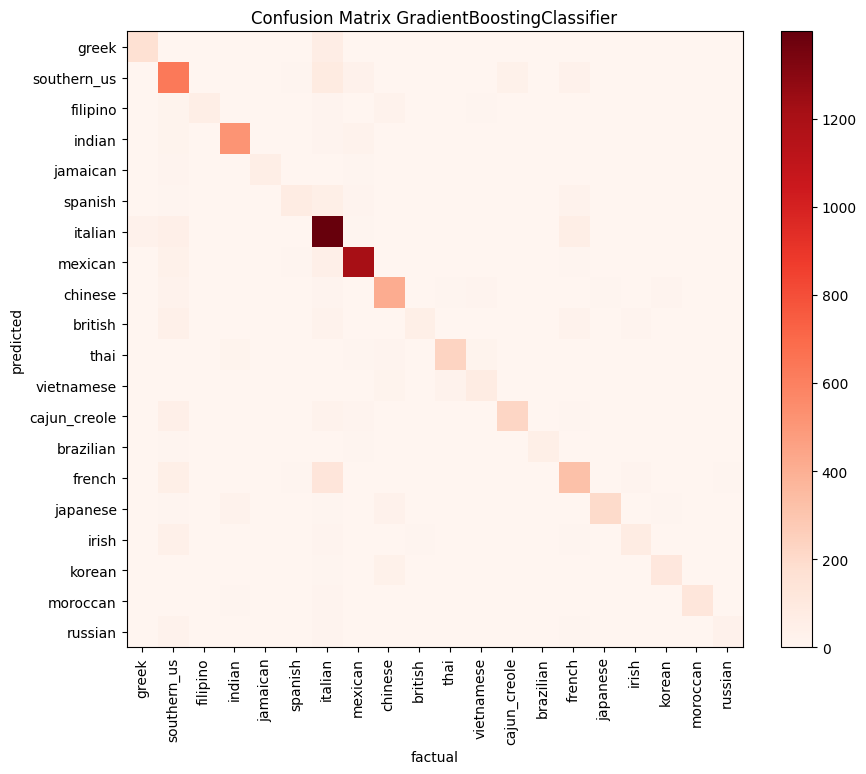

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix {0}'.format(title))
plt.colorbar()
classes = cv.cuisines
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('factual')
plt.ylabel('predicted')
plt.xticks(rotation=90)
plt.show()
